In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
path="/content/gdrive/MyDrive/"

In [ ]:
heart = pd.read_csv(path + 'heart.csv - heart.csv.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Age:Age of the patient

Sex: Sex of the patient [M: Male, F: Female]

ChestPainType:Ch Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: Resting blood pressure [mm Hg]

Cholesterol: Serum cholesterol [mm/dl]

FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina:Exercise-induced angina [Y: Yes, N: No]

Oldpeak: Oldpeak = ST [Numeric value measured in depression]

ST_Slope:The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: Output class [1: heart disease, 0: Normal]

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

EDA

<Axes: xlabel='HeartDisease', ylabel='count'>

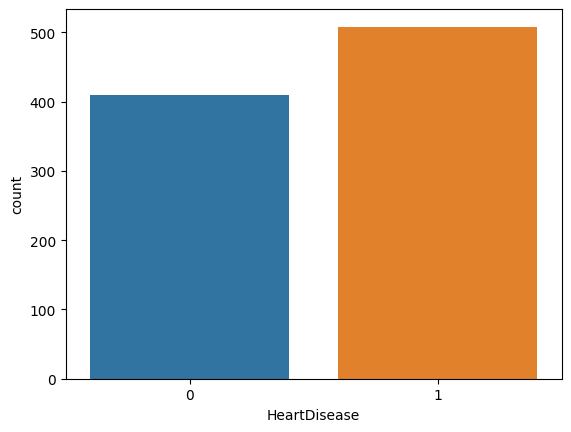

In [ ]:
sns.countplot(x=heart.HeartDisease)

Check if MaxHR and BP have a value of 0 or not, If there are values of MaxHR and BP as zero, we can drop them

In [ ]:
MaxHR = heart[heart['MaxHR'] == 0]
MaxHR

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
RestingBP = heart[heart['RestingBP'] == 0]
RestingBP

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [ ]:
heart =heart.drop(heart[(heart['RestingBP'] == 0)].index)

In [ ]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

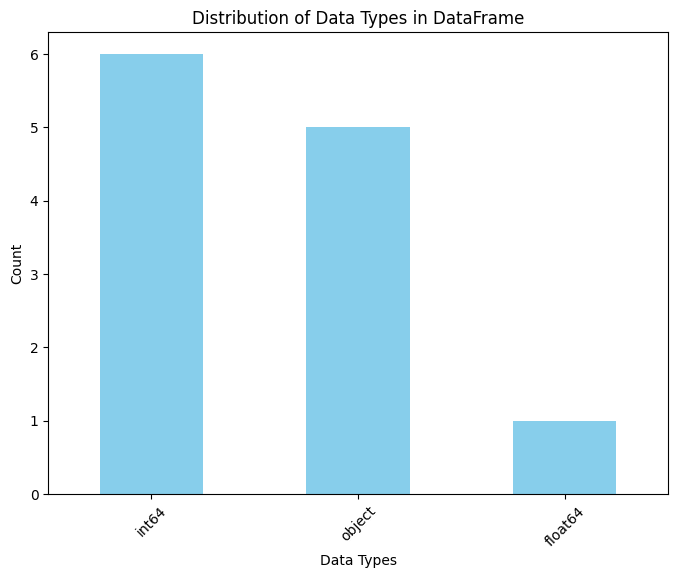

In [ ]:
data_type=heart.dtypes.value_counts()

plt.figure(figsize=(8,6))
data_type.plot(kind='bar', color='skyblue')
plt.title('Distribution of Data Types in DataFrame')
plt.xlabel('Data Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
numerical=heart.select_dtypes(include=['int64','float64']).columns
print(numerical)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


In [ ]:
categorical=heart.select_dtypes(include=['object']).columns
print(categorical)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [ ]:
heart.describe(include = [np.object])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,917,917,917,917,917
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,724,496,551,546,459


In [ ]:
heart.groupby('HeartDisease')['ST_Slope'].value_counts(normalize = True)

HeartDisease  ST_Slope
0             Up          0.773171
              Flat        0.192683
              Down        0.034146
1             Flat        0.749507
              Up          0.153846
              Down        0.096647
Name: ST_Slope, dtype: float64

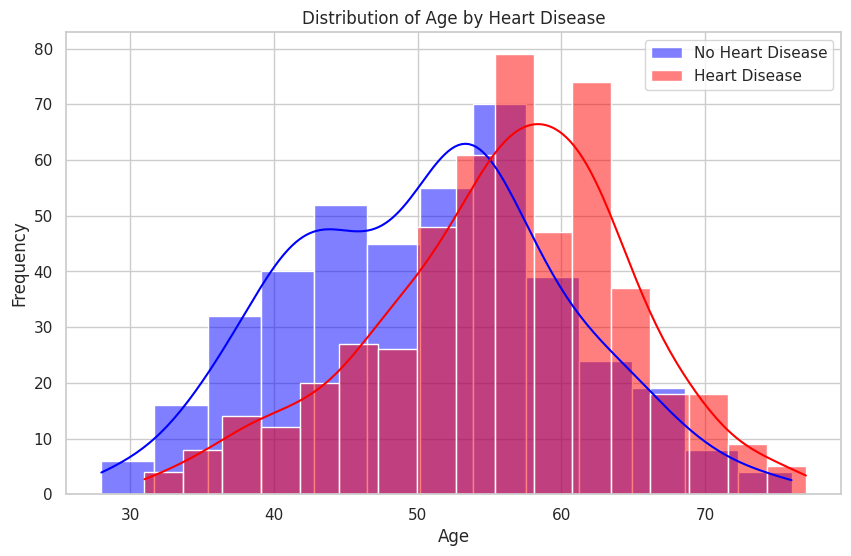

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Plot the distribution of Age for individuals without heart disease (HeartDisease=0)
sns.histplot(data=heart[heart['HeartDisease'] == 0], x='Age', kde=True, color='blue', label='No Heart Disease')

# Plot the distribution of Age for individuals with heart disease (HeartDisease=1)
sns.histplot(data=heart[heart['HeartDisease'] == 1], x='Age', kde=True, color='red', label='Heart Disease')

plt.title('Distribution of Age by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

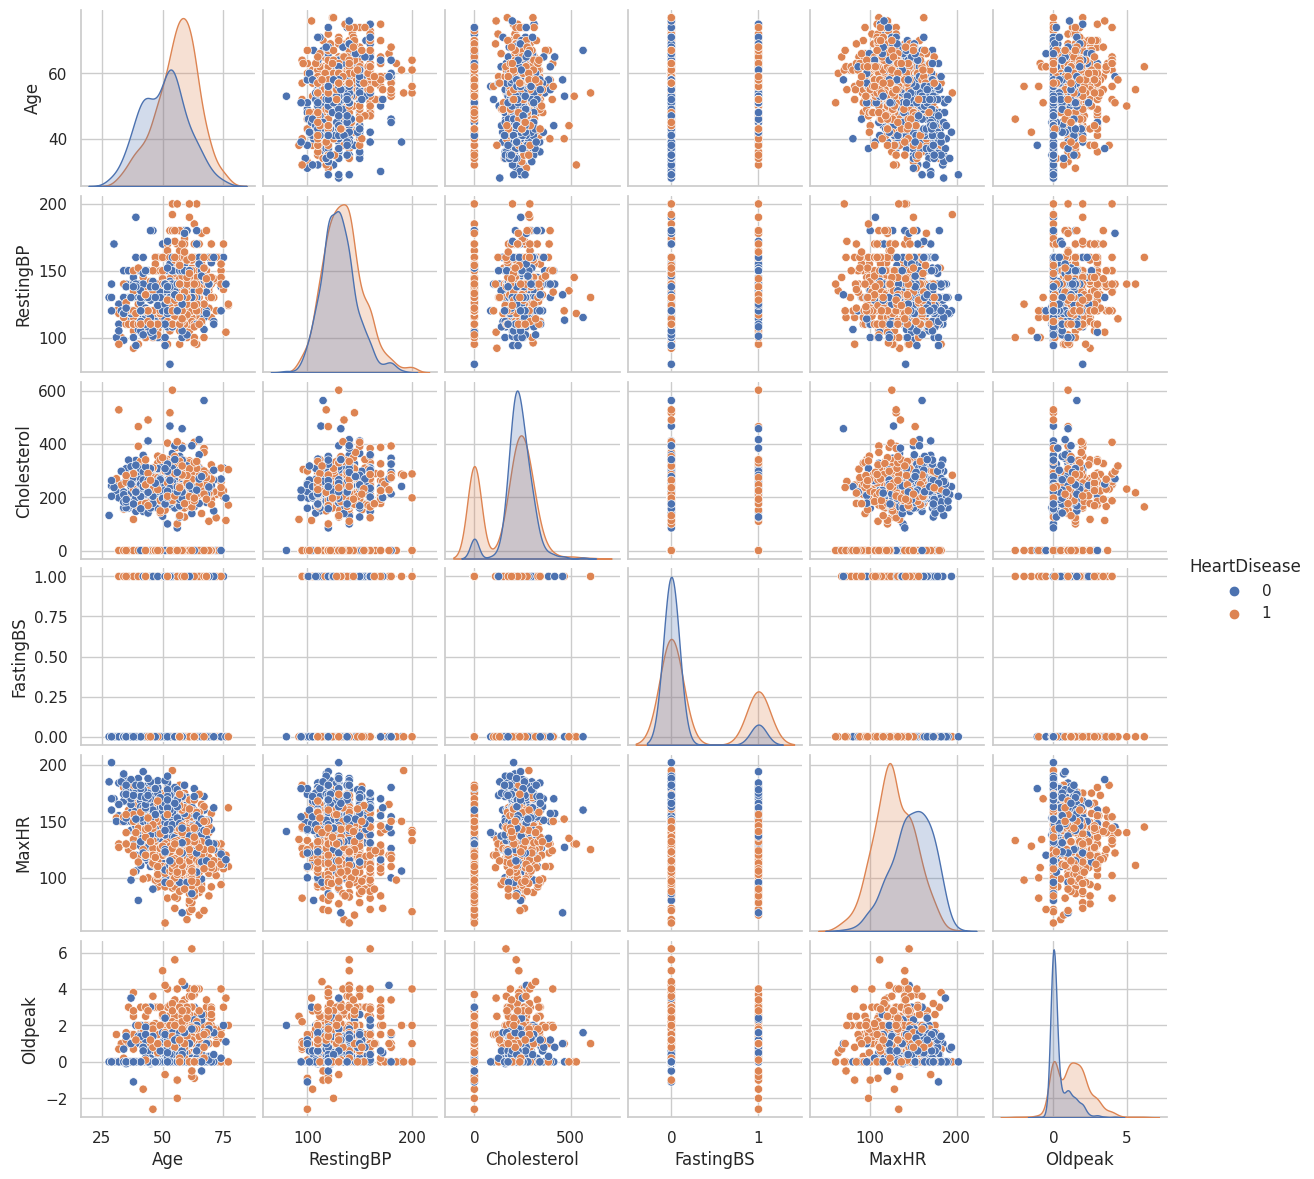

In [ ]:
sns.pairplot(heart,hue = 'HeartDisease', height = 2)

comparision of various features by heart disease

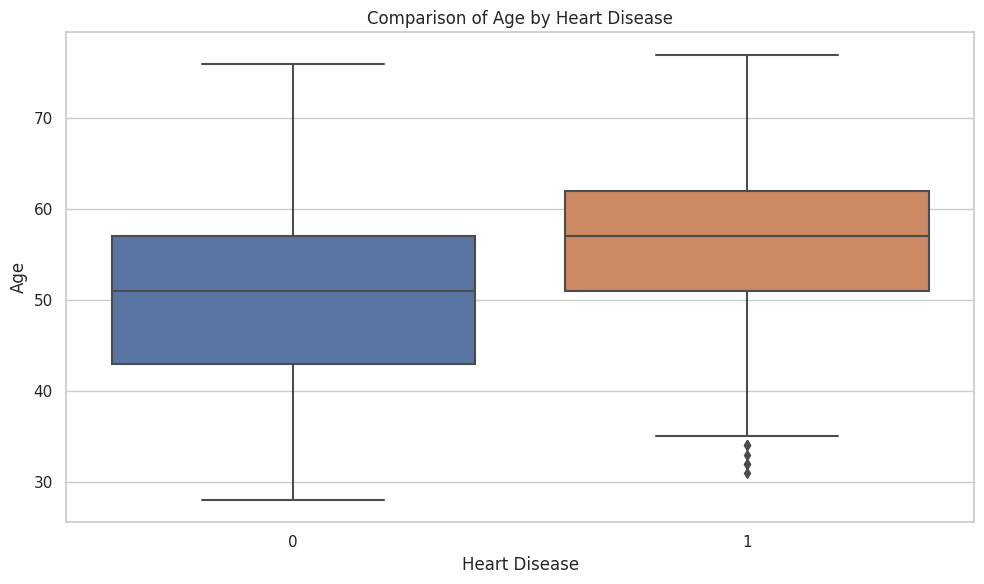

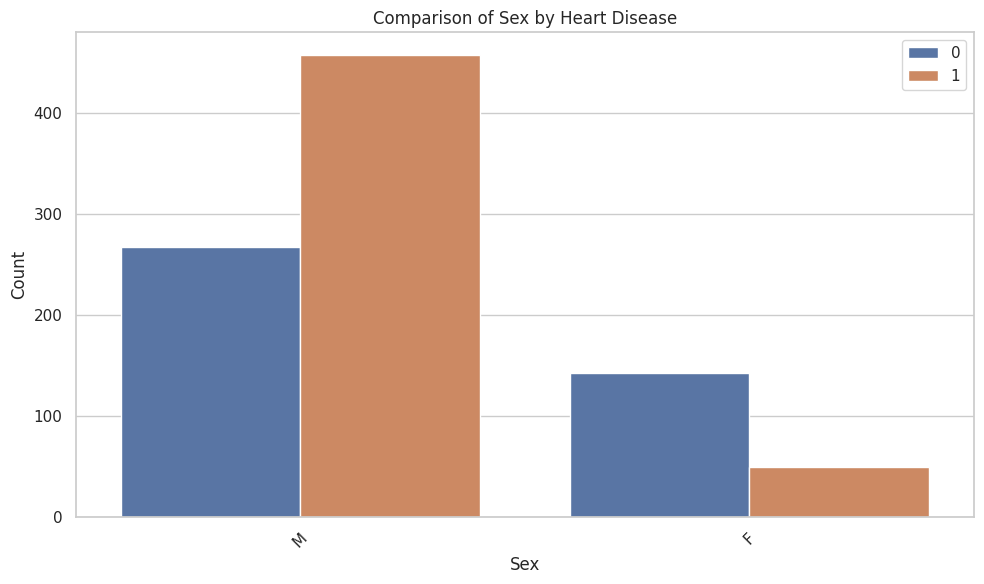

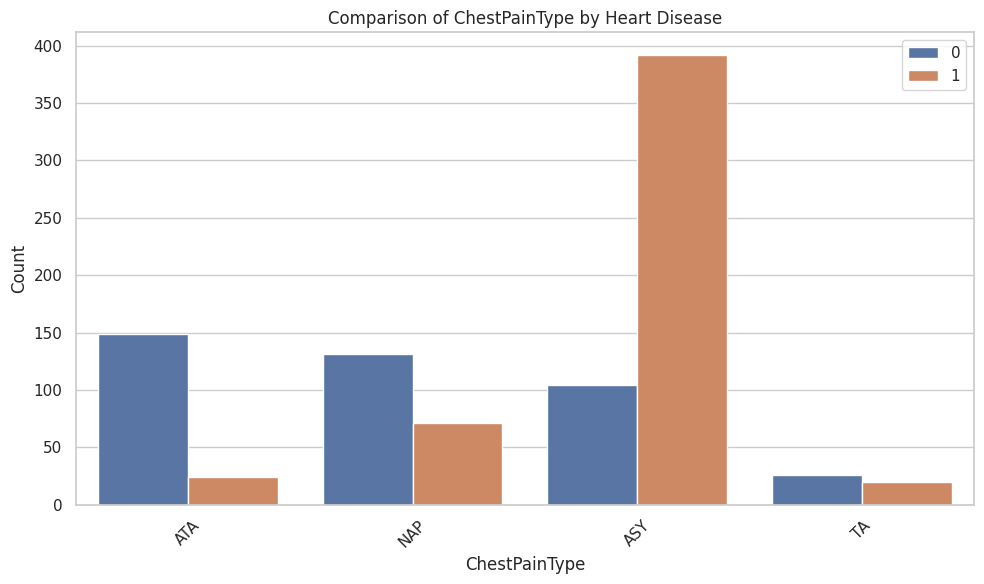

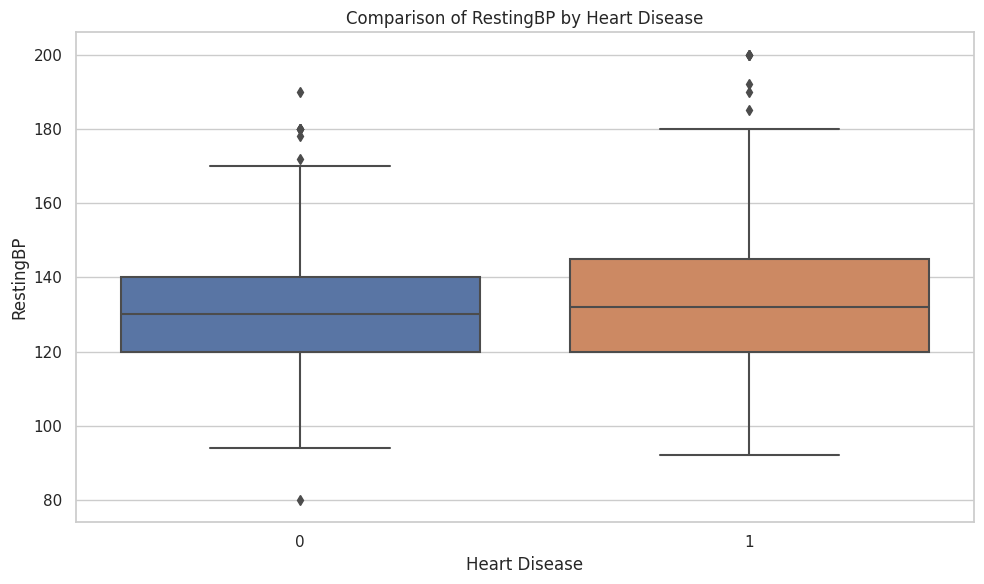

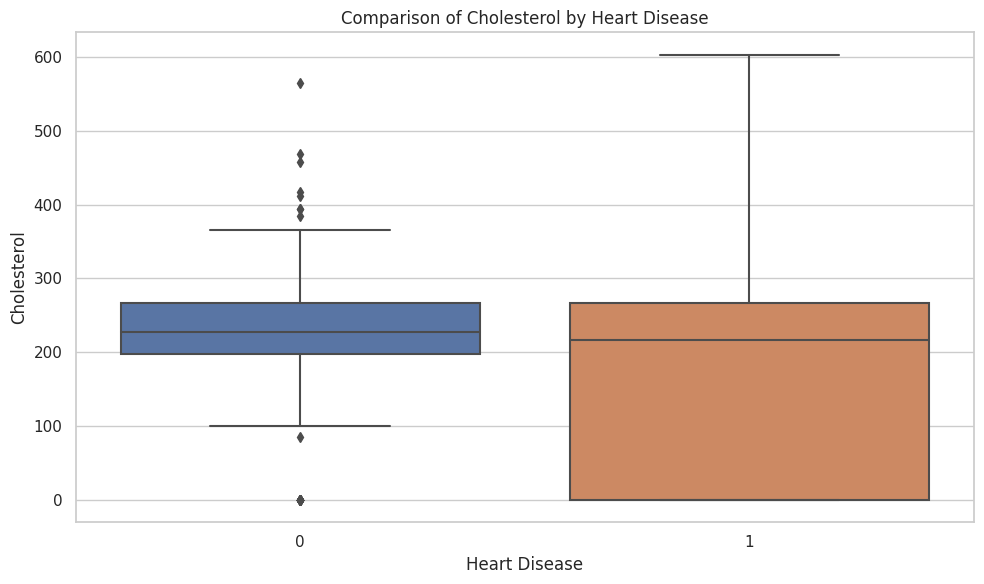

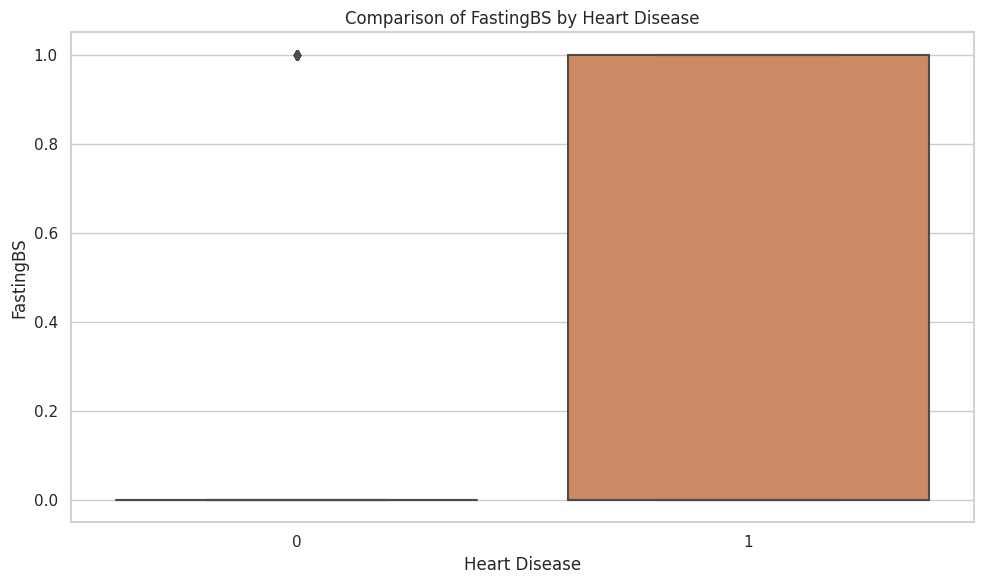

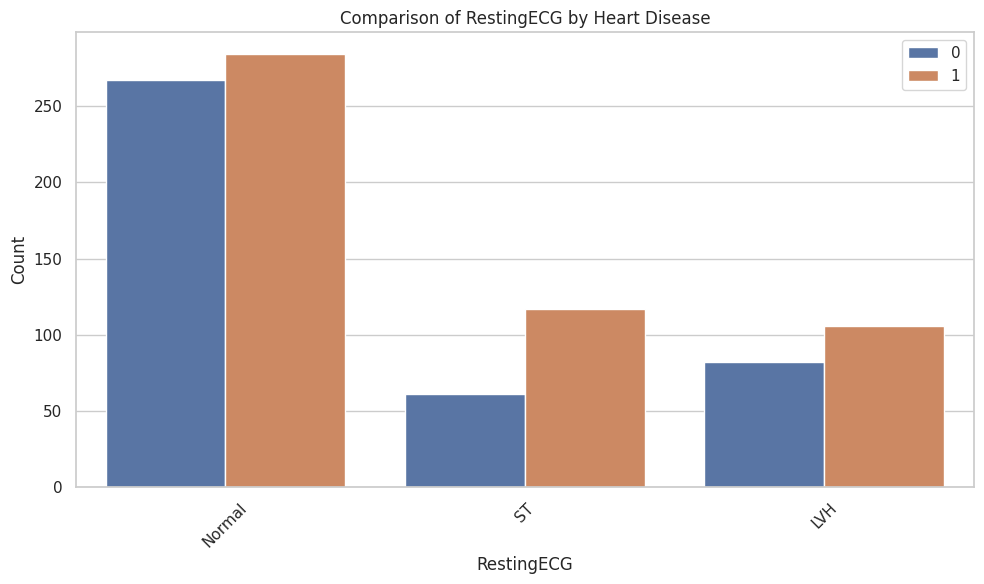

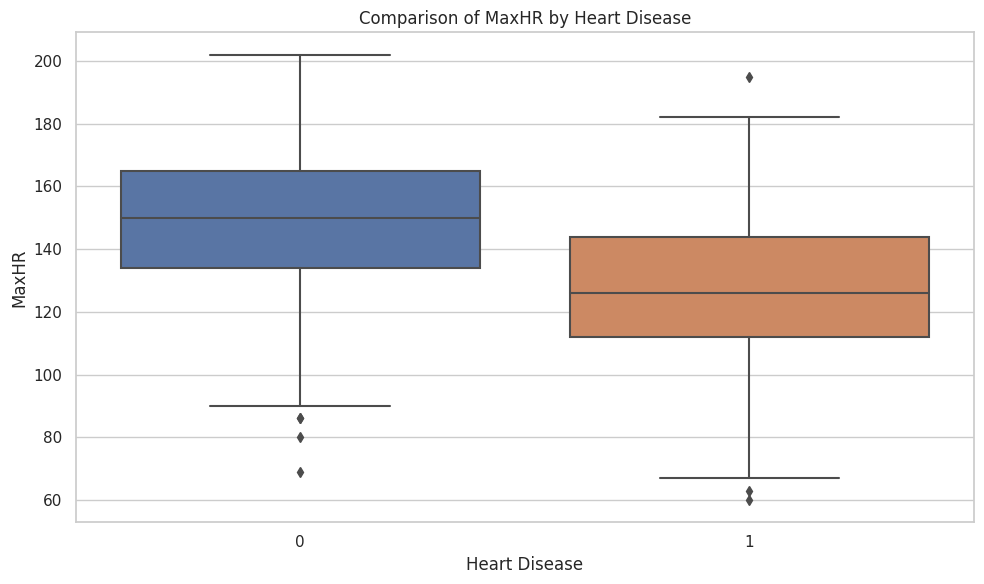

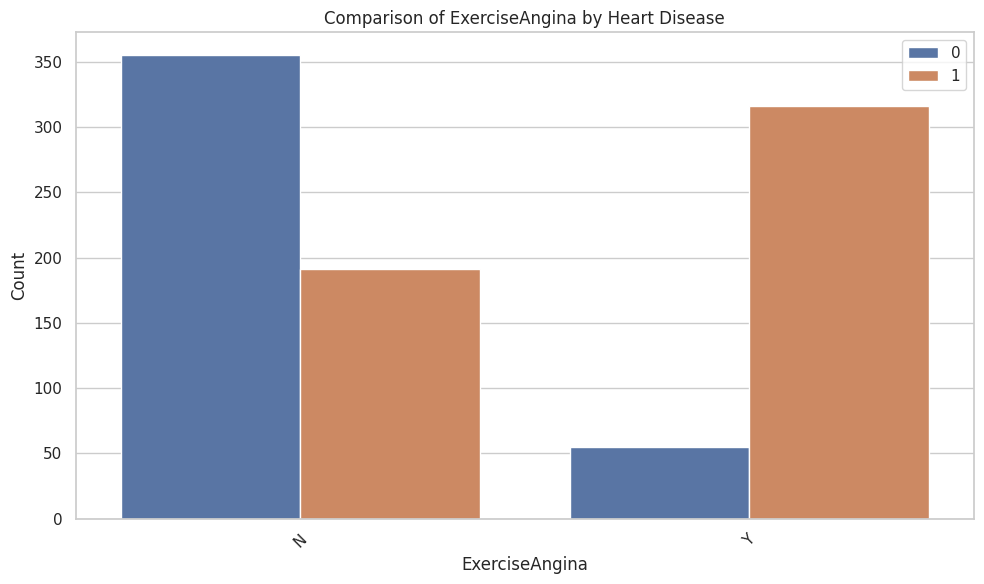

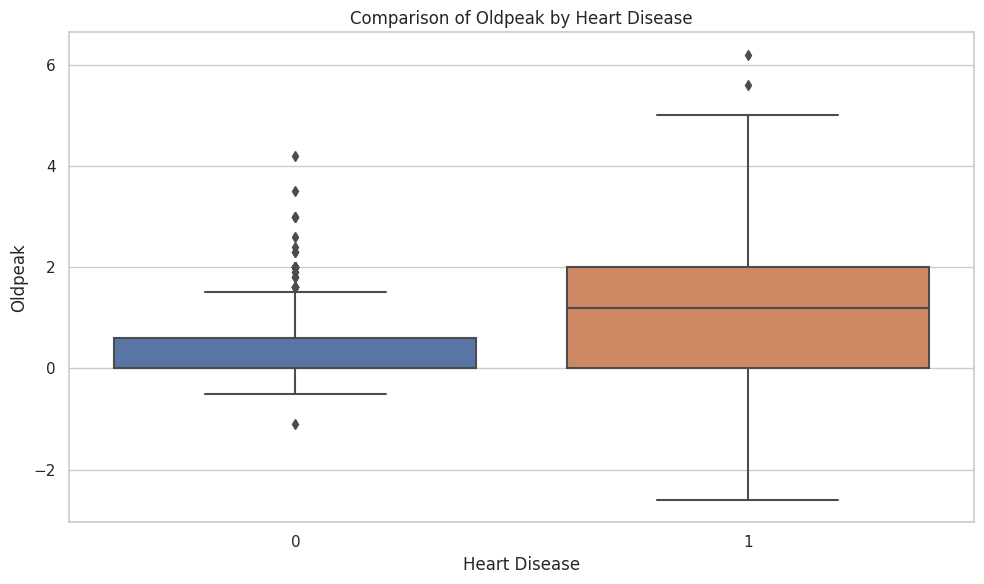

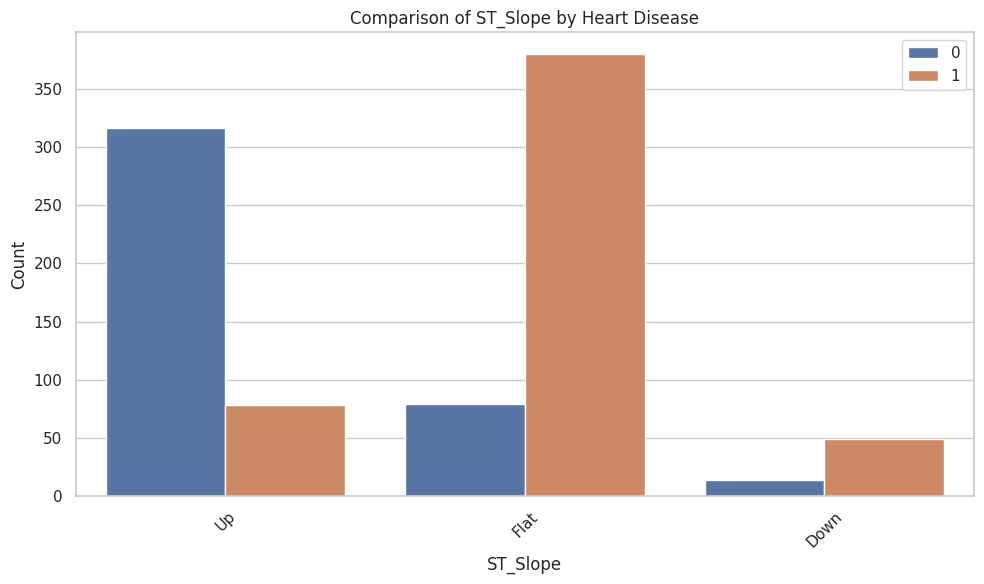

In [ ]:
sns.set(style="whitegrid")


for column in heart.columns:
    if column != 'HeartDisease':
        plt.figure(figsize=(10, 6))


        if heart[column].dtype == 'object':
            sns.countplot(data=heart, x=column, hue='HeartDisease')
            plt.title(f'Comparison of {column} by Heart Disease')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.legend()


        else:
            sns.boxplot(data=heart, x='HeartDisease', y=column)
            plt.title(f'Comparison of {column} by Heart Disease')
            plt.xlabel('Heart Disease')
            plt.ylabel(column)


        plt.tight_layout()
        plt.show()

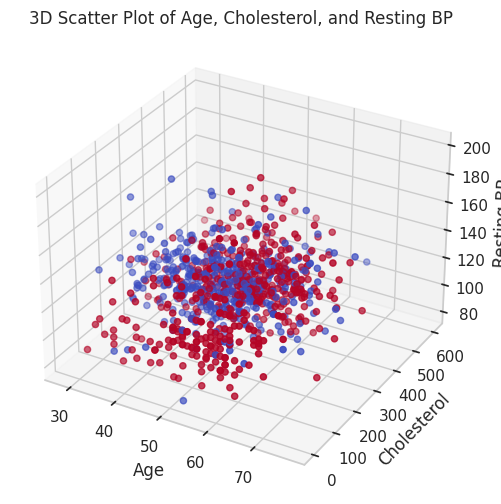

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with Age, Cholesterol, and RestingBP
ax.scatter(heart['Age'], heart['Cholesterol'], heart['RestingBP'], c=heart['HeartDisease'], cmap='coolwarm')
ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Resting BP')
plt.title('3D Scatter Plot of Age, Cholesterol, and Resting BP')
plt.show()


sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))


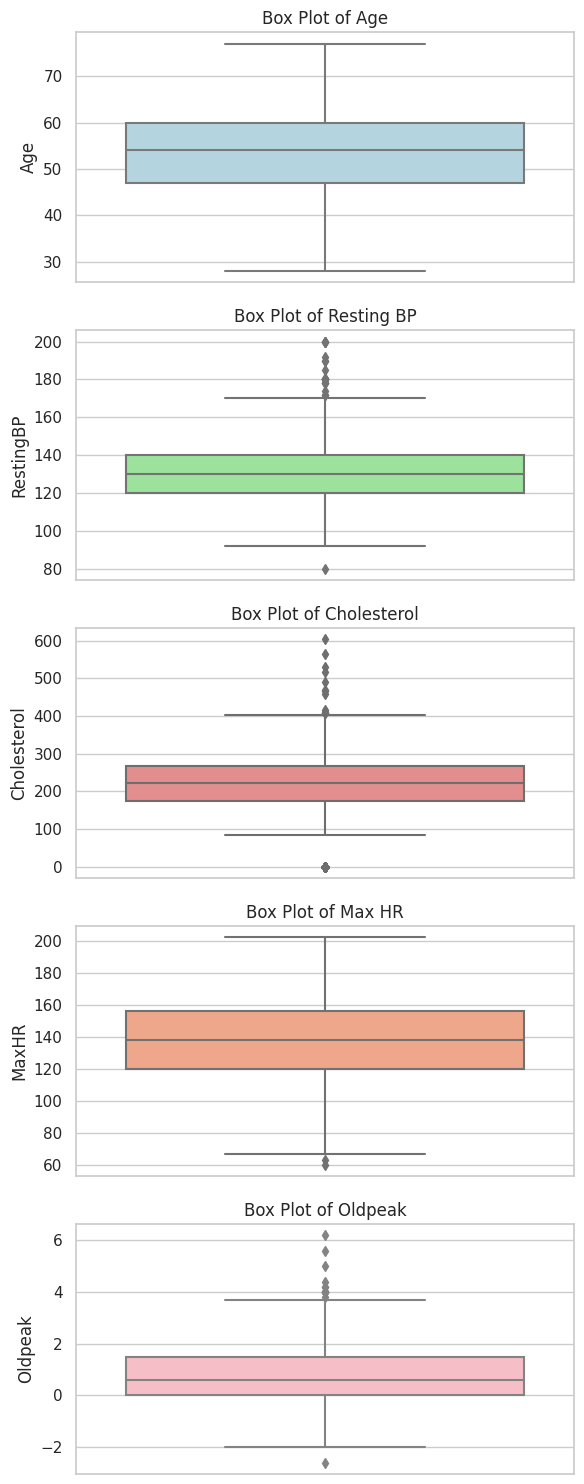

In [ ]:
selected_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df = heart[selected_columns]
sns.set(style="whitegrid")

fig, axes = plt.subplots(5, 1, figsize=(6, 15))

# Plot box plots for Age, RestingBP, Cholesterol, MaxHR, and Oldpeak
sns.boxplot(data=df, y='Age', ax=axes[0], color='lightblue')
axes[0].set_title('Box Plot of Age')

sns.boxplot(data=df, y='RestingBP', ax=axes[1], color='lightgreen')
axes[1].set_title('Box Plot of Resting BP')

sns.boxplot(data=df, y='Cholesterol', ax=axes[2], color='lightcoral')
axes[2].set_title('Box Plot of Cholesterol')

sns.boxplot(data=df, y='MaxHR', ax=axes[3], color='lightsalmon')
axes[3].set_title('Box Plot of Max HR')

sns.boxplot(data=df, y='Oldpeak', ax=axes[4], color='lightpink')
axes[4].set_title('Box Plot of Oldpeak')
plt.tight_layout()
plt.show()

check for outliers

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by filtering the data
filtered_df = df[((df>= lower_bound) & (df <= upper_bound)).all(axis=1)]
print(filtered_df)

     Age  RestingBP  Cholesterol  MaxHR  Oldpeak
0     40        140          289    172      0.0
1     49        160          180    156      1.0
2     37        130          283     98      0.0
3     48        138          214    108      1.5
4     54        150          195    122      0.0
..   ...        ...          ...    ...      ...
913   45        110          264    132      1.2
914   68        144          193    141      3.4
915   57        130          131    115      1.2
916   57        130          236    174      0.0
917   38        138          175    173      0.0

[702 rows x 5 columns]


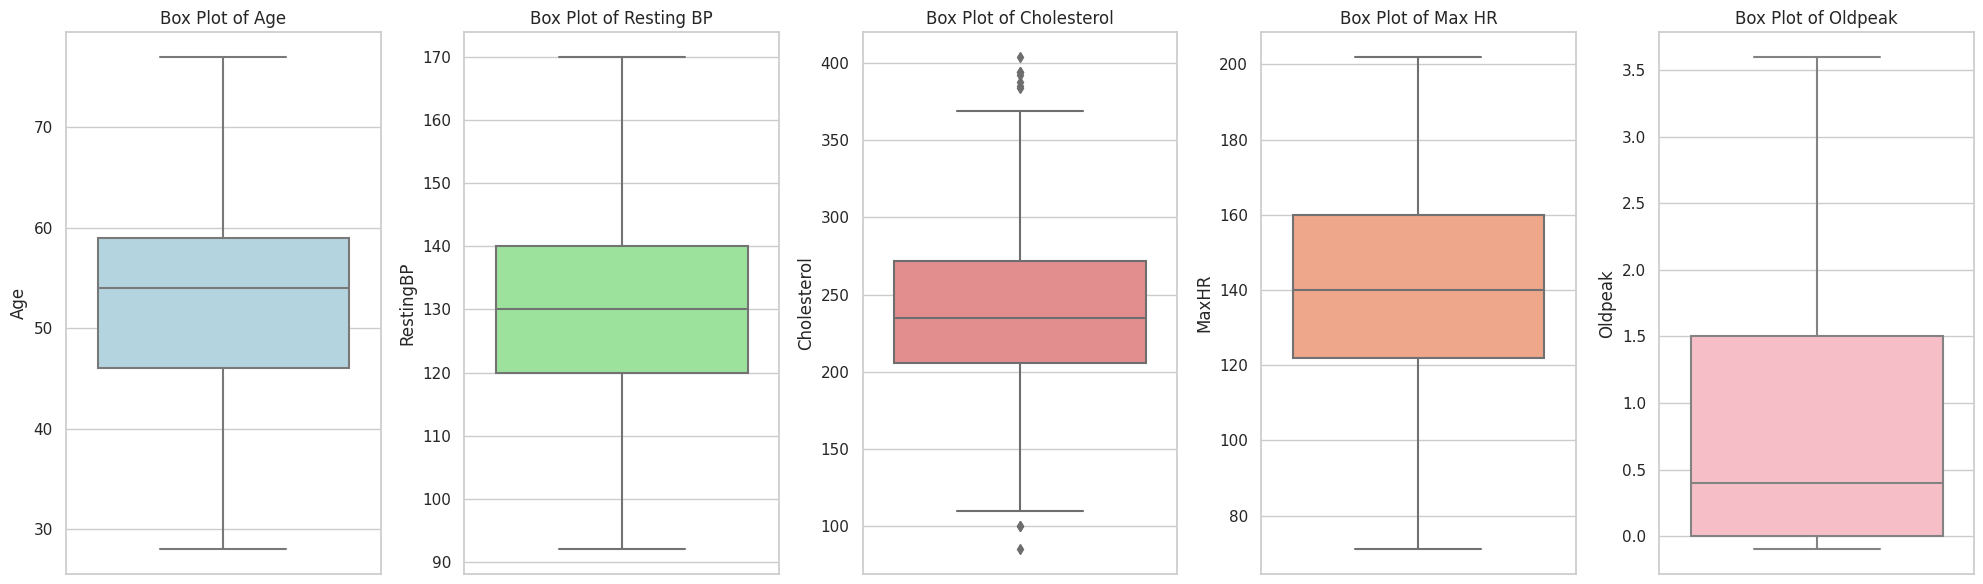

In [ ]:
df=filtered_df
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

# Plot box plots for Age, RestingBP, Cholesterol, MaxHR, and Oldpeak
sns.boxplot(data=df, y='Age', ax=axes[0], color='lightblue')
axes[0].set_title('Box Plot of Age')

sns.boxplot(data=df, y='RestingBP', ax=axes[1], color='lightgreen')
axes[1].set_title('Box Plot of Resting BP')

sns.boxplot(data=df, y='Cholesterol', ax=axes[2], color='lightcoral')
axes[2].set_title('Box Plot of Cholesterol')

sns.boxplot(data=df, y='MaxHR', ax=axes[3], color='lightsalmon')
axes[3].set_title('Box Plot of Max HR')

sns.boxplot(data=df, y='Oldpeak', ax=axes[4], color='lightpink')
axes[4].set_title('Box Plot of Oldpeak')
plt.tight_layout()
plt.show()

In [ ]:
# Append the removed outliers back to the original DataFrame
heart = heart.append(filtered_df)

# Reset the index of the updated DataFrame
heart.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(heart)

      Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0      40    M           ATA        140          289        0.0     Normal   
1      49    F           NAP        160          180        0.0     Normal   
2      37    M           ATA        130          283        0.0         ST   
3      48    F           ASY        138          214        0.0     Normal   
4      54    M           NAP        150          195        0.0     Normal   
...   ...  ...           ...        ...          ...        ...        ...   
1614   45  NaN           NaN        110          264        NaN        NaN   
1615   68  NaN           NaN        144          193        NaN        NaN   
1616   57  NaN           NaN        130          131        NaN        NaN   
1617   57  NaN           NaN        130          236        NaN        NaN   
1618   38  NaN           NaN        138          175        NaN        NaN   

      MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0 

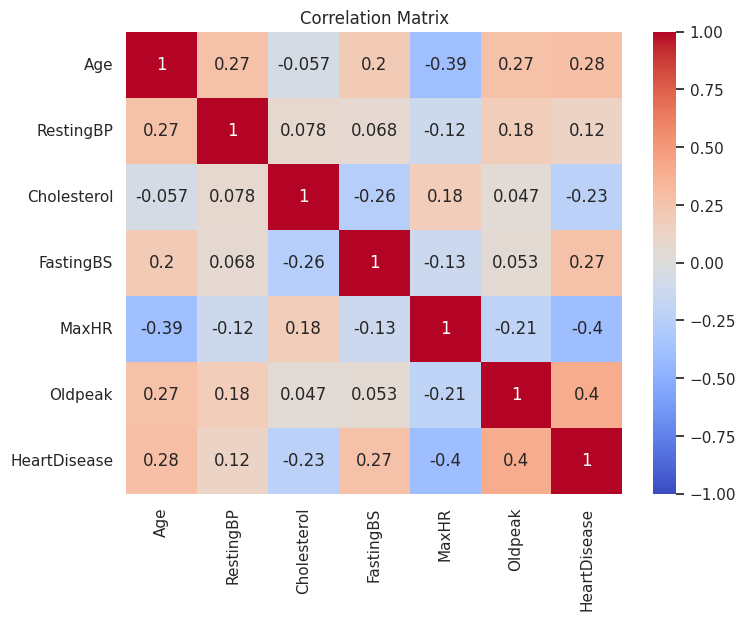

In [ ]:
df = heart
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Preprocessing

In [ ]:
Cholesterol = heart[heart['Cholesterol'] == 0]
Cholesterol

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0.0,Normal,93,Y,0.0,Flat,1.0
294,32,M,TA,95,0,1.0,Normal,127,N,0.7,Up,1.0
295,61,M,ASY,105,0,1.0,Normal,110,Y,1.5,Up,1.0
296,50,M,ASY,145,0,1.0,Normal,139,Y,0.7,Flat,1.0
297,57,M,ASY,110,0,1.0,ST,131,Y,1.4,Up,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
513,43,M,ASY,122,0,0.0,Normal,120,N,0.5,Up,1.0
514,63,M,NAP,130,0,1.0,ST,160,N,3.0,Flat,0.0
517,48,M,NAP,102,0,1.0,ST,110,Y,1.0,Down,1.0
534,56,M,ASY,130,0,0.0,LVH,122,Y,1.0,Flat,1.0


In [ ]:
heart.loc[heart['Cholesterol'] == 0,'Cholesterol'] = np.nan
heart["Cholesterol"] = heart["Cholesterol"].fillna(heart["Cholesterol"].median())

In [ ]:
Cholesterol1 = heart[heart['Cholesterol'] == 0]
Cholesterol1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
for col in heart[categorical]:
    print(heart[categorical][col].value_counts())
    print("****"*10)

M    724
F    193
Name: Sex, dtype: int64
****************************************
ASY    496
NAP    202
ATA    173
TA      46
Name: ChestPainType, dtype: int64
****************************************
Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64
****************************************
N    546
Y    371
Name: ExerciseAngina, dtype: int64
****************************************
Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64
****************************************


In [ ]:
def percent_counts(df, column_name):
    value_counts = df[column_name].value_counts(normalize=True) * 100
    value_counts_df = pd.DataFrame({column_name: value_counts.index, 'Percentage': value_counts.values})
    styled_df = value_counts_df.style.background_gradient(cmap='coolwarm').set_precision(2)
    return styled_df

# List of specified columns
specified_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

# Call the function on specified columns and display the results
for column in specified_columns:
    result = percent_counts(heart, column)
    print(f"Column: {column}")
    display(result)
    print("\n")

Column: Sex


,Sex,Percentage
0,M,78.95
1,F,21.05




Column: ChestPainType


,ChestPainType,Percentage
0,ASY,54.09
1,NAP,22.03
2,ATA,18.87
3,TA,5.02




Column: FastingBS


,FastingBS,Percentage
0,0.00,76.66
1,1.00,23.34




Column: RestingECG


,RestingECG,Percentage
0,Normal,60.09
1,LVH,20.50
2,ST,19.41




Column: ExerciseAngina


,ExerciseAngina,Percentage
0,N,59.54
1,Y,40.46




Column: ST_Slope


,ST_Slope,Percentage
0,Flat,50.05
1,Up,43.08
2,Down,6.87




Column: HeartDisease


,HeartDisease,Percentage
0,1.00,55.29
1,0.00,44.71


Use one hot encoding

In [ ]:
heart = pd.get_dummies(heart,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],drop_first=True)
heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0.0,172,0.0,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180.0,0.0,156,1.0,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0.0,98,0.0,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214.0,0.0,108,1.5,1.0,0,0,0,0,1,0,1,1,0
4,54,150,195.0,0.0,122,0.0,0.0,1,0,1,0,1,0,0,0,1


In [ ]:
heart.isnull().sum()

Age                    0
RestingBP              0
Cholesterol            0
FastingBS            702
MaxHR                  0
Oldpeak                0
HeartDisease         702
Sex_M                  0
ChestPainType_ATA      0
ChestPainType_NAP      0
ChestPainType_TA       0
RestingECG_Normal      0
RestingECG_ST          0
ExerciseAngina_Y       0
ST_Slope_Flat          0
ST_Slope_Up            0
dtype: int64

In [ ]:
heart.fillna(0,inplace=True)

In [ ]:
heart.isnull().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64

In [ ]:
X = heart.drop(['HeartDisease'],axis=1)
y = heart['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_std, columns=X.columns)
X_test = pd.DataFrame(X_test_std, columns=X.columns)

In [ ]:
display(X_train.head())
display(X_test.head())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.931421,0.465883,0.505366,-0.390273,0.861560,2.679614,-0.89941,-0.345891,-0.377564,-0.171007,-0.718274,-0.351462,-0.54523,-0.629039,-0.568078
1,0.087742,0.170487,1.194173,2.562308,1.260800,-0.844272,-0.89941,-0.345891,2.648556,-0.171007,1.392226,-0.351462,-0.54523,-0.629039,1.760322
2,1.036880,-0.124909,0.237497,-0.390273,0.342548,0.526128,-0.89941,-0.345891,-0.377564,-0.171007,-0.718274,-0.351462,-0.54523,-0.629039,-0.568078
3,-1.177776,0.938517,0.046162,-0.390273,1.580192,-0.061186,1.11184,-0.345891,-0.377564,5.847705,-0.718274,-0.351462,-0.54523,-0.629039,1.760322
4,0.615041,1.056675,-0.566111,-0.390273,0.741788,0.721900,-0.89941,-0.345891,-0.377564,-0.171007,-0.718274,-0.351462,-0.54523,-0.629039,-0.568078


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-0.545017,-0.006751,-0.413043,-0.390273,0.941408,-0.844272,-0.89941,-0.345891,-0.377564,-0.171007,-0.718274,-0.351462,-0.54523,-0.629039,-0.568078
1,-0.545017,-0.479385,0.256630,2.562308,1.460420,-0.844272,1.11184,-0.345891,2.648556,-0.171007,1.392226,-0.351462,-0.54523,-0.629039,1.760322
2,0.193202,-0.715701,-0.413043,-0.390273,-0.176465,-0.844272,1.11184,-0.345891,2.648556,-0.171007,-0.718274,-0.351462,-0.54523,-0.629039,1.760322
3,-0.966856,-0.833860,0.007894,-0.390273,0.422396,-0.550615,-0.89941,-0.345891,2.648556,-0.171007,1.392226,-0.351462,-0.54523,1.589727,-0.568078
4,-1.072316,-0.715701,-0.776580,-0.390273,1.061180,-0.844272,-0.89941,-0.345891,-0.377564,-0.171007,-0.718274,-0.351462,-0.54523,-0.629039,-0.568078


Model Selection

In [ ]:
#logistic Regression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_log, y_test) * 100, 2)

print("Training Accuracy    :",log_train,"%")
print("Model Accuracy Score :",log_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_log))
print("Classification_Report: \n",classification_report(y_test,y_pred_log))

Training Accuracy    : 92.97 %
Model Accuracy Score : 91.98 %
Confusion Matrix: 
 [[206  18]
 [  8  92]]
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       224
         1.0       0.84      0.92      0.88       100

    accuracy                           0.92       324
   macro avg       0.90      0.92      0.91       324
weighted avg       0.92      0.92      0.92       324



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

rf_train = round(rf_classifier.score(X_train, y_train) * 100, 2)
rf_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)
rf_f1 = round(f1_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :", rf_train, "%")
print("Model Accuracy Score :", rf_accuracy, "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Training Accuracy    : 99.92 %
Model Accuracy Score : 91.67 %
Confusion Matrix:
 [[203  21]
 [  6  94]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       224
         1.0       0.82      0.94      0.87       100

    accuracy                           0.92       324
   macro avg       0.89      0.92      0.91       324
weighted avg       0.92      0.92      0.92       324



In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

svm_train = round(svm_classifier.score(X_train, y_train) * 100, 2)
svm_accuracy = round(accuracy_score(y_pred_svm, y_test) * 100, 2)
svm_f1 = round(f1_score(y_pred_svm, y_test) * 100, 2)

print("Training Accuracy    :", svm_train, "%")
print("Model Accuracy Score :", svm_accuracy, "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Training Accuracy    : 95.14 %
Model Accuracy Score : 91.05 %
Confusion Matrix:
 [[204  20]
 [  9  91]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       224
         1.0       0.82      0.91      0.86       100

    accuracy                           0.91       324
   macro avg       0.89      0.91      0.90       324
weighted avg       0.92      0.91      0.91       324



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

gb_train = round(gb_classifier.score(X_train, y_train) * 100, 2)
gb_accuracy = round(accuracy_score(y_pred_gb, y_test) * 100, 2)
gb_f1 = round(f1_score(y_pred_gb, y_test) * 100, 2)

print("Training Accuracy    :", gb_train, "%")
print("Model Accuracy Score :", gb_accuracy, "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Training Accuracy    : 96.29 %
Model Accuracy Score : 92.28 %
Confusion Matrix:
 [[205  19]
 [  6  94]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       224
         1.0       0.83      0.94      0.88       100

    accuracy                           0.92       324
   macro avg       0.90      0.93      0.91       324
weighted avg       0.93      0.92      0.92       324



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

knn_train = round(knn_classifier.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
knn_f1 = round(f1_score(y_pred_knn, y_test) * 100, 2)
print("Training Accuracy    :", knn_train, "%")
print("Model Accuracy Score :", knn_accuracy, "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Training Accuracy    : 93.13 %
Model Accuracy Score : 90.43 %
Confusion Matrix:
 [[205  19]
 [ 12  88]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       224
         1.0       0.82      0.88      0.85       100

    accuracy                           0.90       324
   macro avg       0.88      0.90      0.89       324
weighted avg       0.91      0.90      0.91       324



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Create and train the model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Calculate evaluation metrics
dt_train = round(dt_classifier.score(X_train, y_train) * 100, 2)
dt_accuracy = round(accuracy_score(y_pred_dt, y_test) * 100, 2)
dt_f1 = round(f1_score(y_pred_dt, y_test) * 100, 2)

# Print results
print("Training Accuracy    :", dt_train, "%")
print("Model Accuracy Score :", dt_accuracy, "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Training Accuracy    : 99.92 %
Model Accuracy Score : 87.65 %
Confusion Matrix:
 [[197  27]
 [ 13  87]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       224
         1.0       0.76      0.87      0.81       100

    accuracy                           0.88       324
   macro avg       0.85      0.87      0.86       324
weighted avg       0.88      0.88      0.88       324



In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

nb_train = round(nb_classifier.score(X_train, y_train) * 100, 2)
nb_accuracy = round(accuracy_score(y_pred_nb, y_test) * 100, 2)
nb_f1 = round(f1_score(y_pred_nb, y_test) * 100, 2)

print("Training Accuracy    :", nb_train, "%")
print("Model Accuracy Score :", nb_accuracy, "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Training Accuracy    : 90.19 %
Model Accuracy Score : 89.81 %
Confusion Matrix:
 [[197  27]
 [  6  94]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.88      0.92       224
         1.0       0.78      0.94      0.85       100

    accuracy                           0.90       324
   macro avg       0.87      0.91      0.89       324
weighted avg       0.91      0.90      0.90       324



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

xgb_train = round(xgb_classifier.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)
xgb_f1 = round(f1_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy    :", xgb_train, "%")
print("Model Accuracy Score :", xgb_accuracy, "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Training Accuracy    : 99.92 %
Model Accuracy Score : 91.67 %
Confusion Matrix:
 [[204  20]
 [  7  93]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       224
         1.0       0.82      0.93      0.87       100

    accuracy                           0.92       324
   macro avg       0.89      0.92      0.91       324
weighted avg       0.92      0.92      0.92       324



In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
mlp_classifier.fit(X_train, y_train)
y_pred_mlp = mlp_classifier.predict(X_test)

mlp_train = round(mlp_classifier.score(X_train, y_train) * 100, 2)
mlp_accuracy = round(accuracy_score(y_pred_mlp, y_test) * 100, 2)
mlp_f1 = round(f1_score(y_pred_mlp, y_test) * 100, 2)

print("Training Accuracy    :", mlp_train, "%")
print("Model Accuracy Score :", mlp_accuracy, "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

Training Accuracy    : 99.92 %
Model Accuracy Score : 88.58 %
Confusion Matrix:
 [[202  22]
 [ 15  85]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.90      0.92       224
         1.0       0.79      0.85      0.82       100

    accuracy                           0.89       324
   macro avg       0.86      0.88      0.87       324
weighted avg       0.89      0.89      0.89       324



In [ ]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'Random Forest', 'Support Vector Machine (SVM)',
        'Gradient Boosting', 'K-Nearest Neighbors (KNN)', 'Decision Tree',
        'Naive Bayes', 'XGBoost', 'Neural Network (MLP)'
    ],
    'Training Accuracy': [
        log_train, rf_train, svm_train, gb_train, knn_train, dt_train, nb_train,
        xgb_train, mlp_train
    ],
    'Model Accuracy Score': [
        log_accuracy, rf_accuracy, svm_accuracy, gb_accuracy, knn_accuracy,
        dt_accuracy, nb_accuracy, xgb_accuracy, mlp_accuracy
    ],
    'Model f1 Score': [
        log_f1, rf_f1, svm_f1, gb_f1, knn_f1, dt_f1, nb_f1, xgb_f1, mlp_f1
    ]
})

In [ ]:
models.sort_values(by='Model Accuracy Score', ascending=False)

,Model,Training Accuracy,Model Accuracy Score,Model f1 Score
3,Gradient Boosting,96.29,92.28,88.26
0,Logistic Regression,92.97,91.98,87.62
1,Random Forest,99.92,91.67,87.44
7,XGBoost,99.92,91.67,87.32
2,Support Vector Machine (SVM),95.14,91.05,86.26
4,K-Nearest Neighbors (KNN),93.13,90.43,85.02
6,Naive Bayes,90.19,89.81,85.07
8,Neural Network (MLP),99.92,88.58,82.13
5,Decision Tree,99.92,87.65,81.31


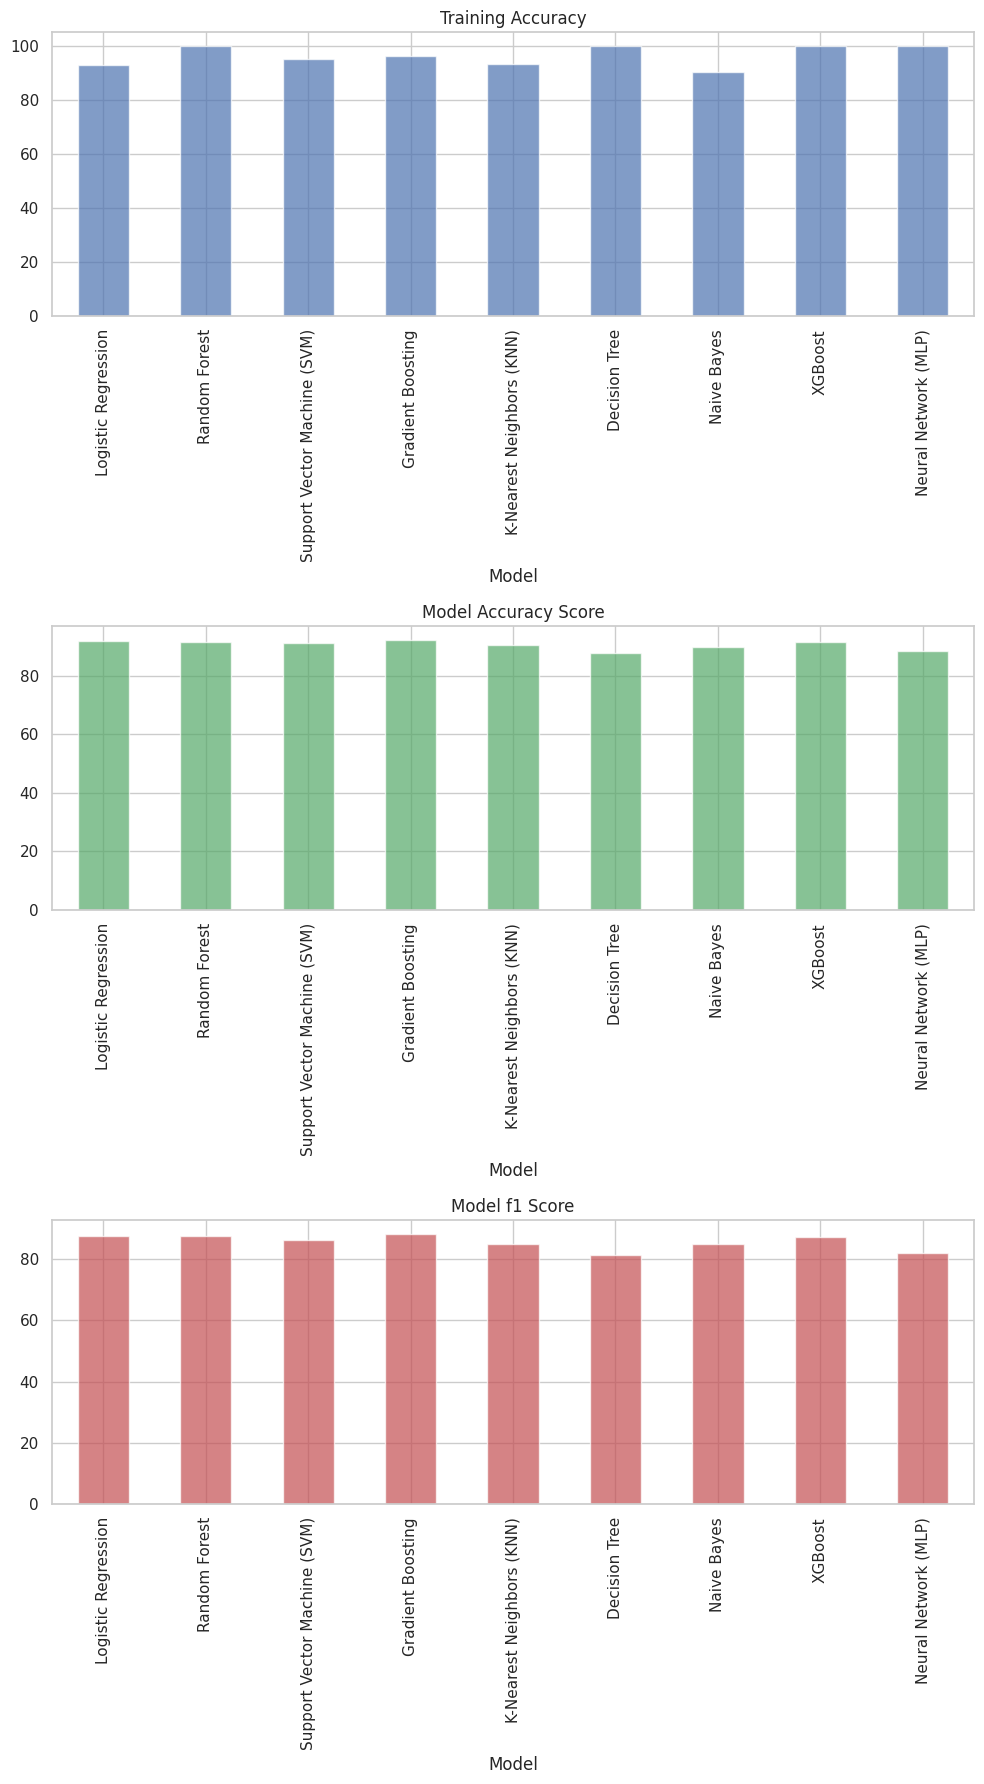

In [ ]:
models.set_index('Model', inplace=True)

# Create subplots for each metric
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# Training Accuracy
models['Training Accuracy'].plot(kind='bar', ax=axes[0], color='b', alpha=0.7)
axes[0].set_title('Training Accuracy')

# Bar plot for Model Accuracy Score
models['Model Accuracy Score'].plot(kind='bar', ax=axes[1], color='g', alpha=0.7)
axes[1].set_title('Model Accuracy Score')

# Model f1 Score
models['Model f1 Score'].plot(kind='bar', ax=axes[2], color='r', alpha=0.7)
axes[2].set_title('Model f1 Score')
plt.tight_layout()
plt.show()